In [1]:
from readin import read_model
from readin import get_info
from decomp_row_col_net import decomp_model
from decomp_row_col_net import solve_decomp_with_slack
from benchmark import solve_obj_0
from benchmark import solve_all_add_slack

import pandas as pd

Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.03 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.03 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.03 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.03 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Create a Row-Column-Net Hypergraph.
We do weighted partition
shmetis ../Tests/readMPS/HGraphFiles/atm20-100rcHG 5 1
Current directory: /Users/aaron/Decomposition/hmetis-1.5-osx-i686
/Users/aaron/Decomposition/Tests/readMPS


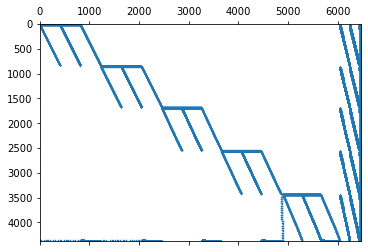

In [9]:
instance = ['atm20-100']
nBlocks_lst = [2,3,4,5,6,7,8,9,10]
HGtype = 'rc' # hypergraph type: 'r' row-net
i = 0
m, m_new, m_new1, m_new2 = read_model(instance[i])
A, x, con, sizeA, nonzeros, RHS, SENSE, vars = get_info(m)
nBlocks = 5
add_slack, add_copy_var, num_linking_cons, num_copy_var, lowest_count, highest_count = decomp_model(A, sizeA, con, nonzeros, vars, instance[i], nBlocks, weight_r = 1, weight_c = 1, flag = 1)

Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.05 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.04 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.09 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.07 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Create a Row-Column-Net Hypergraph.
We do weighted partition
shmetis ../Tests/readMPS/HGraphFiles/atm20-100rcHG 5 1
Current directory: /Users/aaron/Decomposition/hmetis-1.5-osx-i686
/Users/aaron/Decomposition/Tests/readMPS


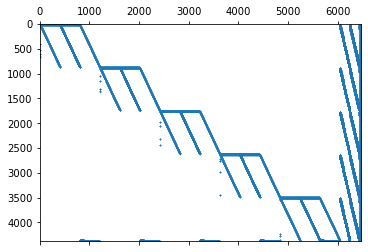

In [13]:
instance = ['atm20-100']
nBlocks_lst = [2,3,4,5,6,7,8,9,10]
HGtype = 'rc' # hypergraph type: 'r' row-net
i = 0
m, m_new, m_new1, m_new2 = read_model(instance[i])
A, x, con, sizeA, nonzeros, RHS, SENSE, vars = get_info(m)
nBlocks = 5
add_slack, add_copy_var, num_linking_cons, num_copy_var, lowest_count, highest_count = decomp_model(A, sizeA, con, nonzeros, vars, instance[i], nBlocks, weight_r = 1, weight_c = 2, flag = 1)

In [14]:
num_copy_var

44798

In [2]:
#instance = ['10teams','bab5', '22433']
instance = ['atm20-100']
nBlocks_lst = [2,3,4,5,6,7,8,9,10]
HGtype = 'rc' # hypergraph type: 'r' row-net


result_all = pd.DataFrame()
for i in range(len(instance)):
    m, m_new, m_new1, m_new2 = read_model(instance[i])
    A, x, con, sizeA, nonzeros, RHS, SENSE, vars = get_info(m)
    
    obj_to_0_time, obj_to_0_status  = solve_obj_0(m_new1)
    all_add_slack_time, all_add_slack_status  = solve_all_add_slack(A, vars, SENSE, RHS)
    print('Obj to 0 solving time:', obj_to_0_time)
    print('All adding slack variable solving time:', all_add_slack_time)
    for nBlocks in nBlocks_lst:
        add_slack, add_copy_var, num_linking_cons, num_copy_var, lowest_count, highest_count = decomp_model(A, sizeA, con, nonzeros, vars, instance[i], nBlocks, weight_r = 1, weight_c = 1.2)
        feasibility_time, feasibility_status = solve_decomp_with_slack(A, vars, RHS, SENSE, add_slack, add_copy_var)
        
        print('Linking Constraint Feasibility Problem solving time:', feasibility_time)
        result = pd.DataFrame()
        result['instance'] = [instance[i]]
        result['Number of blocks'] = [nBlocks]
        result['Hypergraph type'] = [HGtype]
        result['Num linking cons'] = [num_linking_cons]
        result['Largest block'] = [highest_count]
        result['Smallest block'] = [lowest_count]
        result['Linking constraint add slack time'] = [feasibility_time]
        result['Linking constraint add slack status'] = [feasibility_status]
        result['Obj to 0 time'] = [obj_to_0_time]
        result['Obj to 0 status'] = [obj_to_0_status]
        result['All add slack time'] = [all_add_slack_time]
        result['All add slack status'] = [all_add_slack_status]
        result_all = pd.concat([result_all, result])
        
result_all

Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.04 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.05 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.06 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.06 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 6480 columns and 58878 nonzeros
Model fingerprint: 0x112d3696
Variable types: 4260 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 6e+03]


<ipython-input-2-543bf2a1acfd>:13: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  all_add_slack_time, all_add_slack_status  = solve_all_add_slack(A, vars, SENSE, RHS)


Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12900 columns and 65298 nonzeros
Model fingerprint: 0xad64dd58
Variable types: 10680 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2418826.0000
Presolve time: 0.09s
Presolved: 4380 rows, 12900 columns, 65298 nonzeros
Variable types: 10660 continuous, 2240 integer (2220 binary)

Root relaxation: objective 0.000000e+00, 2537 iterations, 0.22 seconds (0.17 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  123 2418826.00    0.00000   100%     -    0s
H    0     0    